# Analyse exploratoire – Bank Marketing

Ce notebook contient l'exploration des données de la campagne de marketing bancaire (Bank Marketing UCI).
L'objectif est d'analyser les caractéristiques des clients et de préparer les données pour entraîner un modèle de prédiction.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Affichage de toutes les colonnes
pd.set_option('display.max_columns', None)

# Chargement des données
df = pd.read_csv("data/bank_marketing/bank/bank.csv", sep=';')

# Aperçu des premières lignes
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Aperçu général du dataset 

In [ ]:
# Taille du dataset
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])

# Infos générales
df.info()

# Valeurs manquantes
df.isnull().sum()

Nombre de lignes : 4521
Nombre de colonnes : 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Traitement des données manquantes ou anormales 

## Analyse exploratoire (EDA)

In [ ]:
# Statistiques numériques
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Distribution de la cible 



Text(0.5, 1.0, 'Répartition de la variable cible (y)')

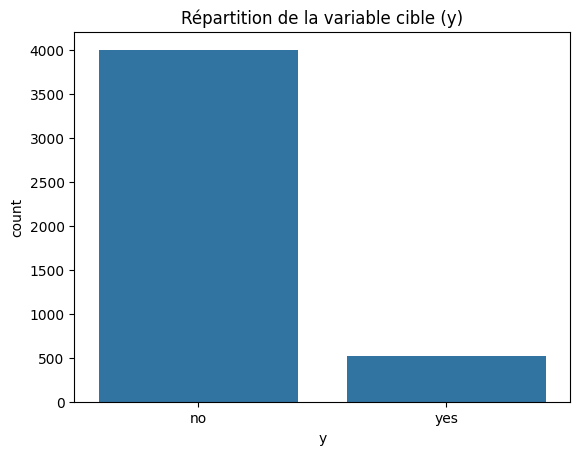

In [ ]:
sns.countplot(x='y', data=df)
plt.title("Répartition de la variable cible (y)")

On observe que la majorité des clients ont refusé l’offre de dépôt à terme (no). Il y a donc un déséquilibre de classes qui pourrait influencer les performances du modèle.

 ## Distribution de l'âge des clients

Text(0.5, 1.0, "Distribution de l'âge")

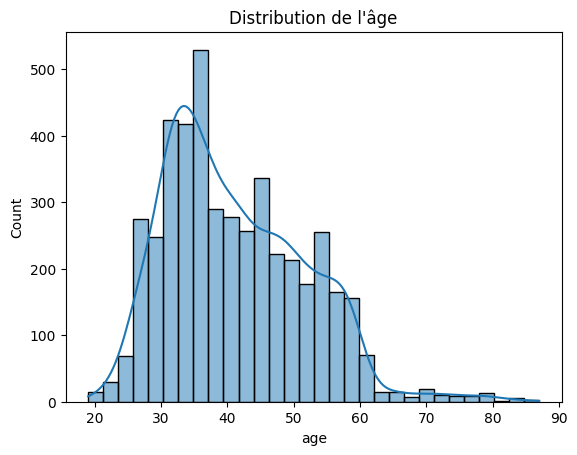

In [ ]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution de l'âge")

La majorité des clients ont entre 25 et 60 ans, avec un pic vers 30-40 ans. Cela peut aider à identifier les tranches d’âge les plus réactives aux campagnes marketing.

## Taux de souscription par emploi 

Text(0.5, 1.0, 'Taux de souscription par emploi')

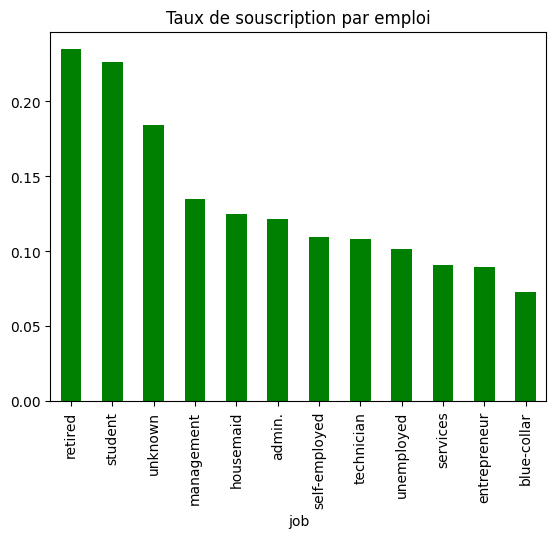

In [ ]:
# Taux de 'yes' par type de job
job_success_rate = df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes']
job_success_rate.sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Taux de souscription par emploi")

Certains emplois, comme étudiants, retraités, ou cadres, ont un taux de souscription plus élevé. Cela montre que la profession peut être un bon prédicteur de la réponse à une offre.

 ## Nettoyage final 

In [ ]:
# On peut choisir de supprimer les lignes avec NaN si elles sont peu nombreuses :
#df_clean = df.dropna()

# Vérification
#df_clean.isnull().sum().sum()

# Conclusion de l'exploration

Nous avons :
- Importé et exploré les données
- Identifié et nettoyé les valeurs manquantes (remplacé 'unknown')
- Réalisé des visualisations sur les variables importantes
- Préparé un jeu de données propre pour la modélisation

Le dataset nettoyé est prêt à être utilisé dans PyCaret pour construire un modèle de classification.
